# Multiple Linear Regression

Estimated time needed: **15** minutes

## Objectives

After completing this notebook you will be able to:

*   Use scikit-learn to implement Multiple Linear Regression
*   Create a model, train it, test it and use the model

### Importing needed packages

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importing the dataset

In [75]:
df = pd.read_csv("../data/FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


<h2 id="understanding_data">Understanding the Data</h2>

### `FuelConsumption.csv`:

We have downloaded a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01)

*   **MODELYEAR** e.g. 2014
*   **MAKE** e.g. Acura
*   **MODEL** e.g. ILX
*   **VEHICLE CLASS** e.g. SUV
*   **ENGINE SIZE** e.g. 4.7
*   **CYLINDERS** e.g 6
*   **TRANSMISSION** e.g. A6
*   **FUELTYPE** e.g. z
*   **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
*   **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
*   **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
*   **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


In [76]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267


In [77]:
X = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']]
y = df[['CO2EMISSIONS']]

In [78]:
# we split train and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y)

<h2 id="multiple_regression_model">Multiple Regression Model</h2>


In reality, there are multiple variables that impact the co2emission. When more than one independent variable is present, the process is called multiple linear regression. An example of multiple linear regression is predicting co2emission using the features FUELCONSUMPTION_COMB, EngineSize and Cylinders of cars. The good thing here is that multiple linear regression model is the extension of the simple linear regression model.

In [79]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [80]:
# print the coefficient
print ('Coefficients: ', model.coef_)

Coefficients:  [[11.47651741  7.69435503  9.30445137]]


### Prediction on test data

In [81]:
y_pred = model.predict(X_test)
print("Residual sum of squares: %.2f"
      % np.mean((y_pred - y_test) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % model.score(X_test,y_test))

Residual sum of squares: 482.35
Variance score: 0.87


c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [92]:
# predict our manual test data
engine_size = 2.4
cylinder = 4
fuelconsumption = 9.2
pred = model.predict([[engine_size,cylinder,fuelconsumption]])
dummy = (2.4 * 11.47651741 ) + ( 4 * 7.69435503) + (9.2 * 9.30445137) + 66.07981647
pred,dummy

c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


(array([[210.001831]]), 210.001830978)

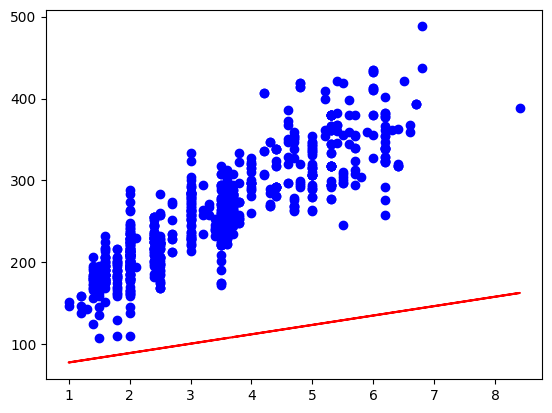

In [83]:
coefficient = model.coef_
eng_coef = coefficient[0][0]
cyl_coef = coefficient[0][1]
fuel_coef = coefficient[0][2]
intercept = model.intercept_[0]
plt.scatter(X_train.ENGINESIZE,y_train,color='blue')
plt.plot(X_train['ENGINESIZE'], (eng_coef*X_train['ENGINESIZE'] + intercept), '-r')


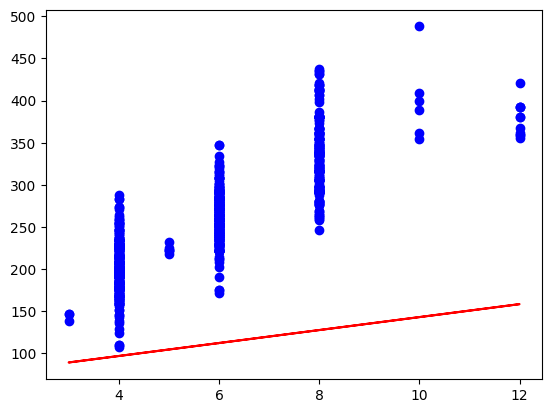

In [87]:
plt.scatter(X_train.CYLINDERS,y_train,color='blue')
plt.plot(X_train['CYLINDERS'], (cyl_coef*X_train['CYLINDERS'] + intercept), '-r')

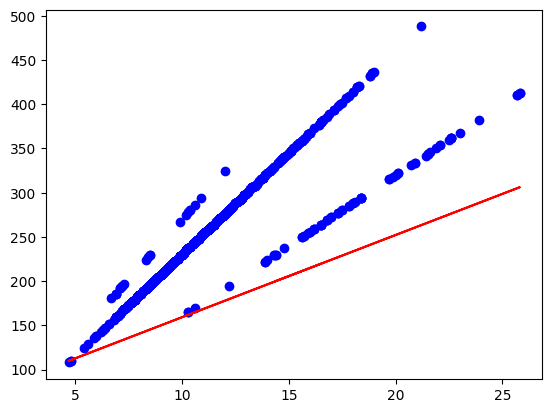

In [88]:
plt.scatter(X_train.FUELCONSUMPTION_COMB,y_train,color='blue')
plt.plot(X_train['FUELCONSUMPTION_COMB'], (fuel_coef*X_train['FUELCONSUMPTION_COMB'] + intercept), '-r')